                                                               **ASSIGNMENT -- 5**

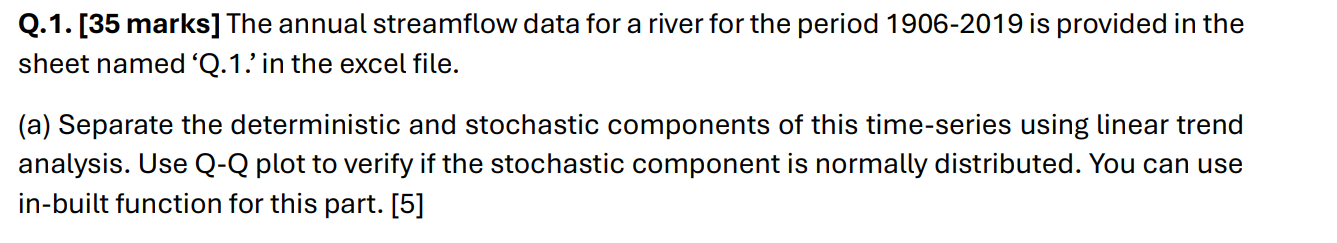

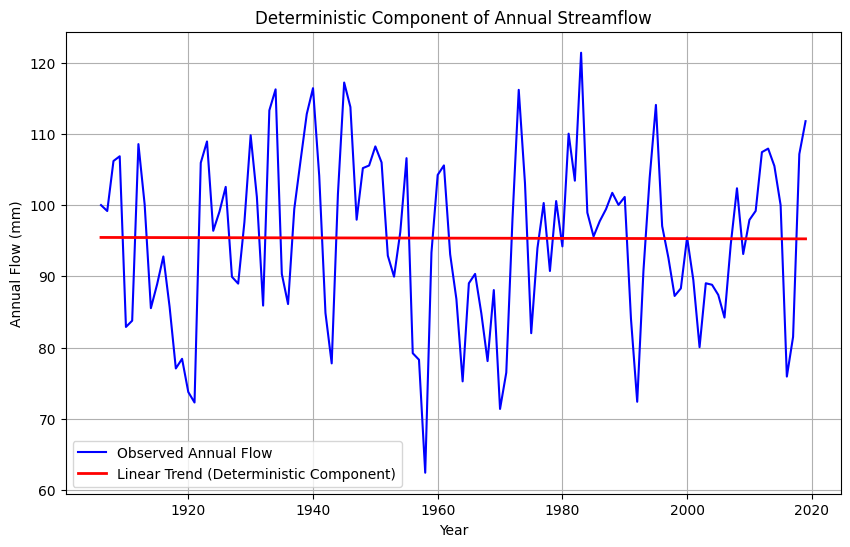

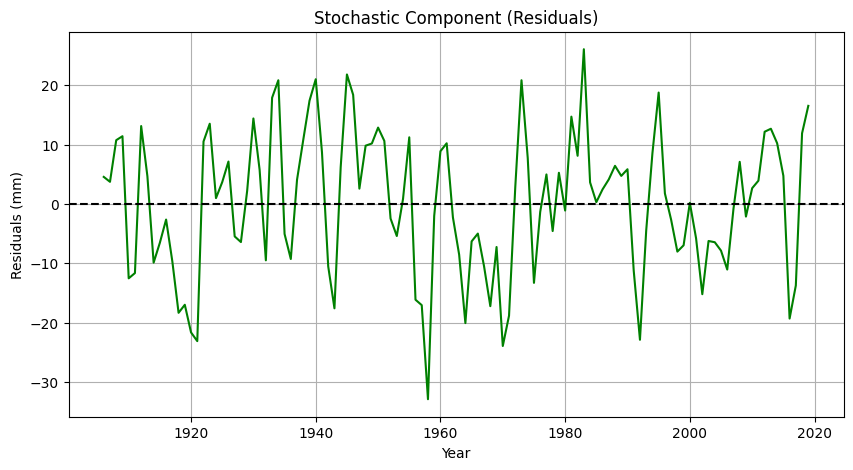

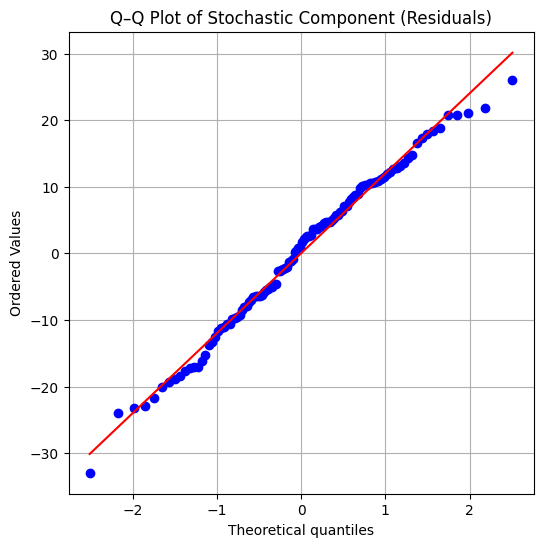

Linear trend equation: Flow = -0.0017 * Year + 98.7722
Mean of residuals (should be close to 0): -0.0000
Standard deviation of residuals: 11.8449


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Import the data
data = pd.read_csv('annual.csv')

# Extract Year and Flow
years = data['Year']
flow = data['Annual flow (mm)']

# Linear trend analysis (Deterministic component)
# Fit a linear regression line: flow = a * year + b
coeffs = np.polyfit(years, flow, 1)
trend = np.polyval(coeffs, years)

# Compute stochastic (residual) component
residuals = flow - trend

# Plot original data, trend, and residuals
plt.figure(figsize=(10,6))
plt.plot(years, flow, label='Observed Annual Flow', color='blue')
plt.plot(years, trend, label='Linear Trend (Deterministic Component)', color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Annual Flow (mm)')
plt.title('Deterministic Component of Annual Streamflow')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals (stochastic component)
plt.figure(figsize=(10,5))
plt.plot(years, residuals, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals (mm)')
plt.title('Stochastic Component (Residuals)')
plt.grid(True)
plt.show()

# Q–Q Plot for residuals to test normality
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q–Q Plot of Stochastic Component (Residuals)')
plt.grid(True)
plt.show()

# summary
print("Linear trend equation: Flow = {:.4f} * Year + {:.4f}".format(coeffs[0], coeffs[1]))
print("Mean of residuals (should be close to 0): {:.4f}".format(np.mean(residuals)))
print("Standard deviation of residuals: {:.4f}".format(np.std(residuals)))


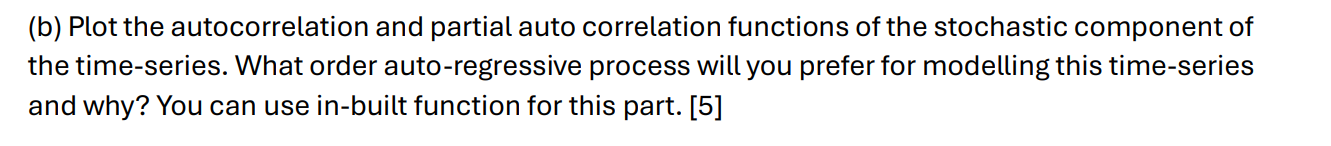

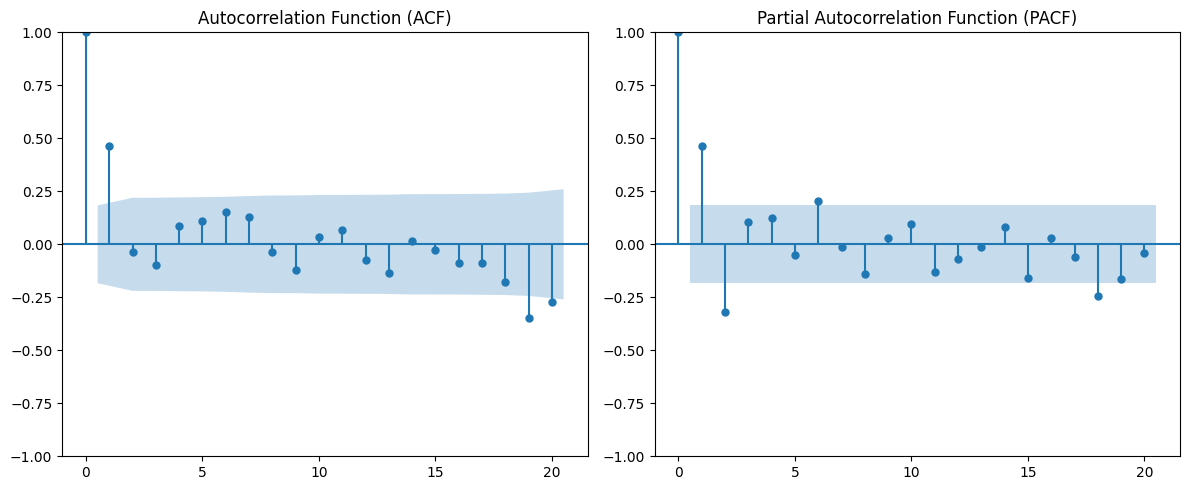

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# `residuals` is obtained from part (a)

# Plot ACF and PACF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(residuals, lags=20, ax=plt.gca(), title='Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=20, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)', method='ywm')

plt.tight_layout()
plt.show()


From the ACF and PACF plots of the stochastic (residual) component, the ACF shows a gradual decay while the PACF cuts off sharply after lag 2.
This indicates that the residual time series can be appropriately modeled using a first-order autoregressive process, AR(2).

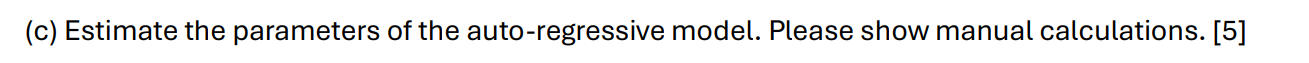

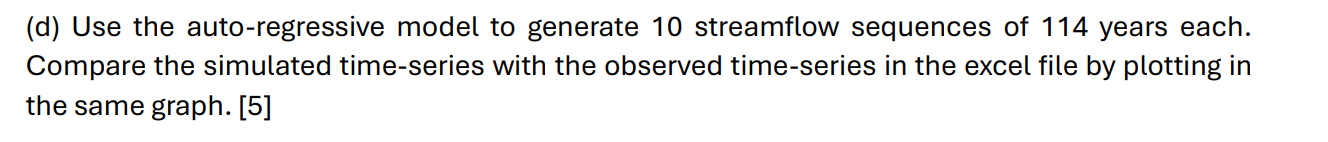

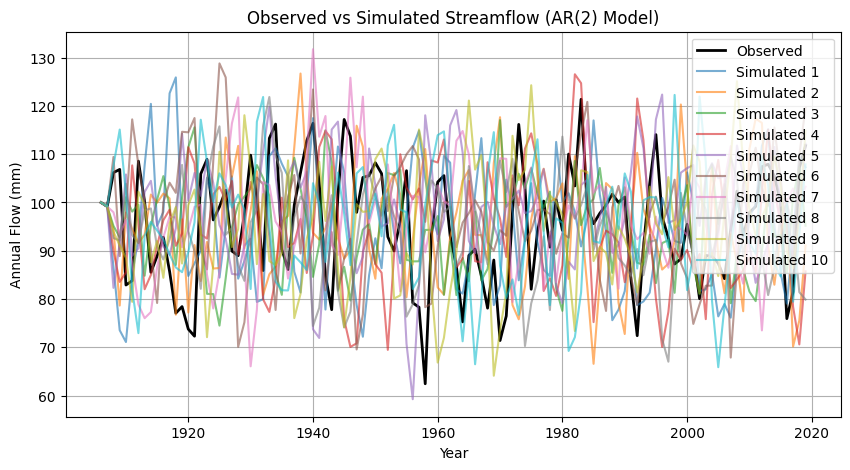

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('annual.csv')
df.columns = ['Year', 'Flow']
N = len(df)

# Detrend to get stochastic component
x = np.arange(N)
coeffs = np.polyfit(x, df['Flow'], 1)
trend = np.polyval(coeffs, x)
stochastic = df['Flow'] - trend

# AR(2) parameters (from part c)
phi1 = 0.6140
phi2 = -0.3215
sigma_eps = 9.9317
n_sim = 10

# Generate 10 sequences
simulations = []

for j in range(n_sim):
    S = np.zeros(N)
    # initialize first two values with observed residuals
    S[0], S[1] = stochastic[0], stochastic[1]

    # simulate recursively
    eps = np.random.normal(0, sigma_eps, N)
    for t in range(2, N):
        S[t] = phi1*S[t-1] + phi2*S[t-2] + eps[t]

    # Add back deterministic trend
    simulated_flow = S + trend
    simulations.append(simulated_flow)

# Plot comparison
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Flow'], color='black', label='Observed', linewidth=2)

for i, sim in enumerate(simulations):
    plt.plot(df['Year'], sim, alpha=0.6, label=f'Simulated {i+1}')

plt.title('Observed vs Simulated Streamflow (AR(2) Model)')
plt.xlabel('Year')
plt.ylabel('Annual Flow (mm)')
plt.legend()
plt.grid(True)
plt.show()


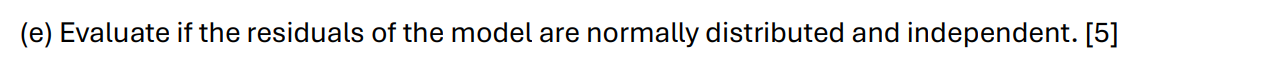

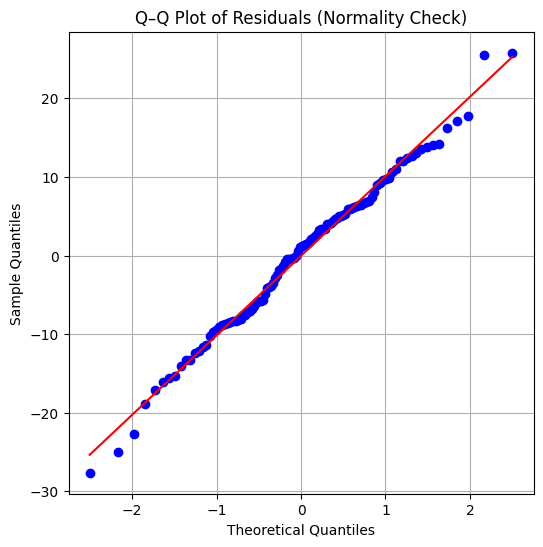

<Figure size 800x400 with 0 Axes>

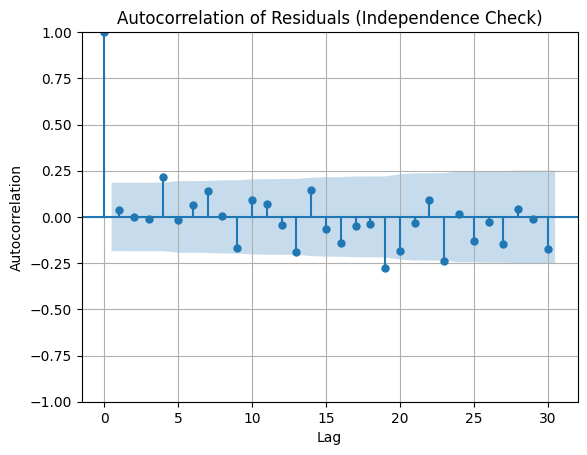

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

# Read data
df = pd.read_csv('annual.csv')
df.columns = ['Year', 'Flow']
N = len(df)

# Remove deterministic component
x = np.arange(N)
coeffs = np.polyfit(x, df['Flow'], 1)
trend = np.polyval(coeffs, x)
stochastic = df['Flow'] - trend

# AR(2) parameters (from Part c)
phi1 = 0.6140
phi2 = -0.3215

# model-predicted values
resid = np.zeros(N)
for t in range(2, N):
    resid[t] = stochastic[t] - (phi1 * stochastic[t-1] + phi2 * stochastic[t-2])

# Remove first two undefined residuals
residuals = resid[2:]

# (a) Normality Check – Q–Q Plot
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals (Normality Check)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

# (b) Independence Check – ACF Plot
plt.figure(figsize=(8,4))
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals (Independence Check)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


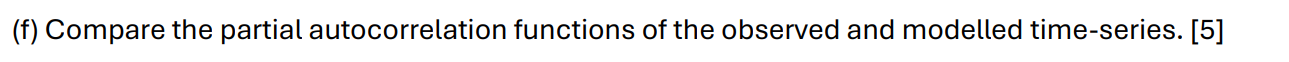

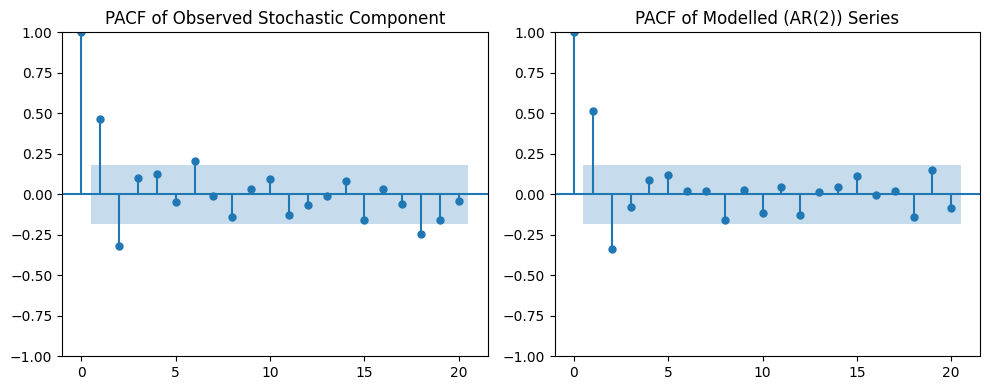

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# ---------- 1. Read and detrend observed data ----------
df = pd.read_csv('annual.csv')
df.columns = ['Year', 'Flow']
N = len(df)

x = np.arange(N)
coeffs = np.polyfit(x, df['Flow'], 1)
trend = np.polyval(coeffs, x)
stochastic = df['Flow'] - trend  # observed stochastic component

# ---------- 2. AR(2) model parameters ----------
phi1 = 0.6140
phi2 = -0.3215
sigma_eps = 9.9317

# ---------- 3. Generate one modelled (simulated) series ----------
S_model = np.zeros(N)
S_model[0], S_model[1] = stochastic[0], stochastic[1]
eps = np.random.normal(0, sigma_eps, N)

for t in range(2, N):
    S_model[t] = phi1*S_model[t-1] + phi2*S_model[t-2] + eps[t]

# ---------- 4. Plot PACFs ----------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plot_pacf(stochastic, lags=20, title="PACF of Observed Stochastic Component", ax=plt.gca())

plt.subplot(1,2,2)
plot_pacf(S_model, lags=20, title="PACF of Modelled (AR(2)) Series", ax=plt.gca())

plt.tight_layout()
plt.show()


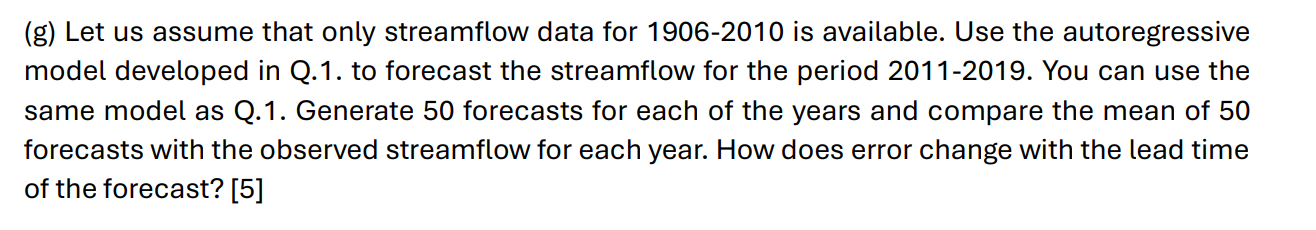

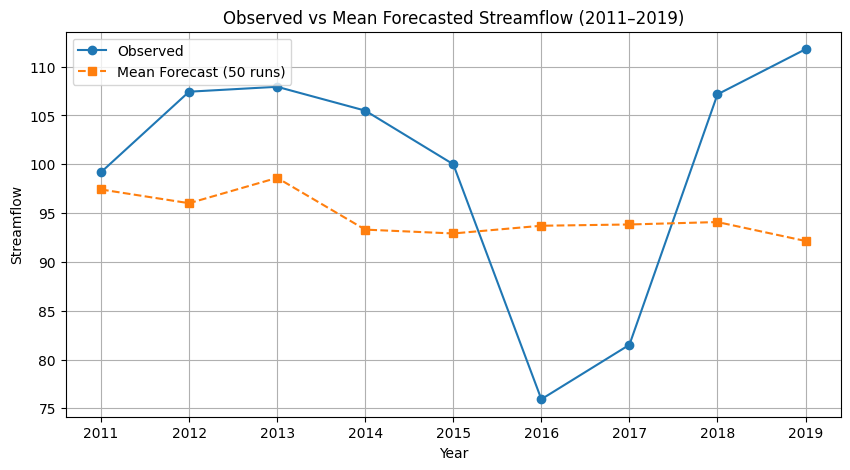

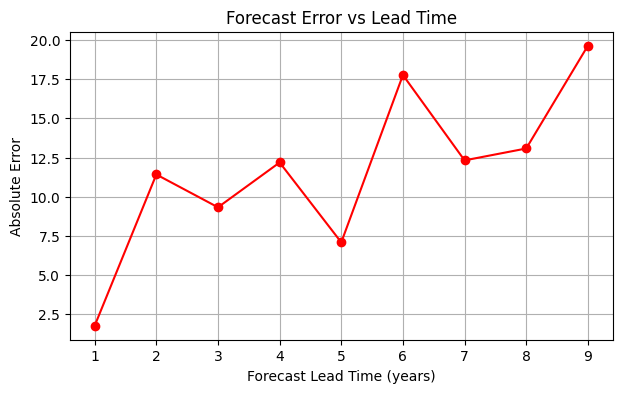

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Read full data ----------
df = pd.read_csv('annual.csv')
df.columns = ['Year', 'Flow']
N = len(df)

# Split into training and testing sets
train = df[df['Year'] <= 2010].reset_index(drop=True)
test = df[df['Year'] >= 2011].reset_index(drop=True)

# ---------- 2. Detrend the full series ----------
x = np.arange(N)
coeffs = np.polyfit(x, df['Flow'], 1)
trend = np.polyval(coeffs, x)
stochastic = df['Flow'] - trend

# AR(2) parameters from Q.1
phi1 = 0.6140
phi2 = -0.3215
sigma_eps = 9.9317

# ---------- 3. Forecast setup ----------
n_forecast = len(test)
n_sim = 50
forecasts = np.zeros((n_sim, n_forecast))

# initial values (last two stochastic values from training data)
S_prev1 = stochastic[train.index[-1]]     # 2010
S_prev2 = stochastic[train.index[-2]]     # 2009

# ---------- 4. Generate 50 forecast simulations ----------
for i in range(n_sim):
    S_f = np.zeros(n_forecast)
    s1, s2 = S_prev1, S_prev2
    for t in range(n_forecast):
        eps = np.random.normal(0, sigma_eps)
        s_new = phi1*s1 + phi2*s2 + eps
        S_f[t] = s_new
        s2, s1 = s1, s_new  # shift for next forecast
    forecasts[i, :] = S_f

# ---------- 5. Mean forecast (average of 50 realizations) ----------
mean_forecast_stochastic = forecasts.mean(axis=0)

# Add back the trend for forecast years
trend_future = trend[-n_forecast:]
mean_forecast_flow = mean_forecast_stochastic + trend_future

# ---------- 6. Compare with observed ----------
observed_future = test['Flow'].values
years_future = test['Year'].values

# Compute absolute error
error = np.abs(mean_forecast_flow - observed_future)

# ---------- 7. Plot results ----------
plt.figure(figsize=(10,5))
plt.plot(years_future, observed_future, 'o-', label='Observed')
plt.plot(years_future, mean_forecast_flow, 's--', label='Mean Forecast (50 runs)')
plt.xlabel('Year')
plt.ylabel('Streamflow')
plt.title('Observed vs Mean Forecasted Streamflow (2011–2019)')
plt.legend()
plt.grid(True)
plt.show()

# ---------- 8. Plot forecast error vs lead time ----------
plt.figure(figsize=(7,4))
plt.plot(np.arange(1, n_forecast+1), error, 'ro-')
plt.xlabel('Forecast Lead Time (years)')
plt.ylabel('Absolute Error')
plt.title('Forecast Error vs Lead Time')
plt.grid(True)
plt.show()


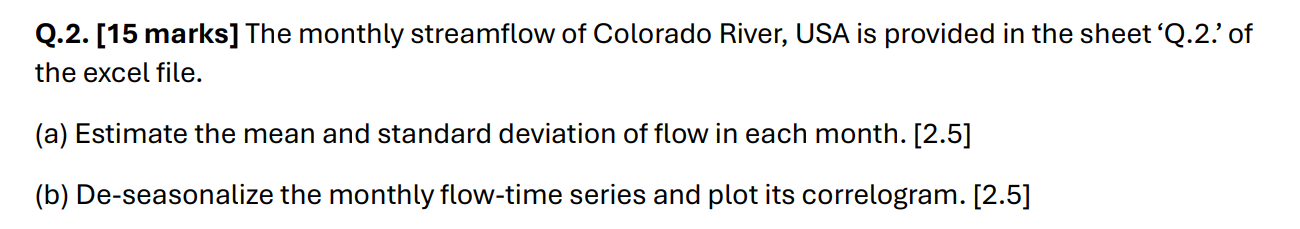


Monthly Mean and Standard Deviation of Streamflow (ac-ft/month):
                mean            std
Month                              
1       47430.982456    8266.877372
2       44189.947368   10818.361389
3       59000.587719   16941.901082
4      128056.578947   48179.961000
5      441969.219298  150205.340481
6      661347.245614  257711.390287
7      320445.508772  158788.036368
8      145592.780702   52751.797534
9       86712.956140   27771.150085
10      74786.469565   20849.420845
11      61132.043478   12299.955541
12      51234.713043   10071.160458


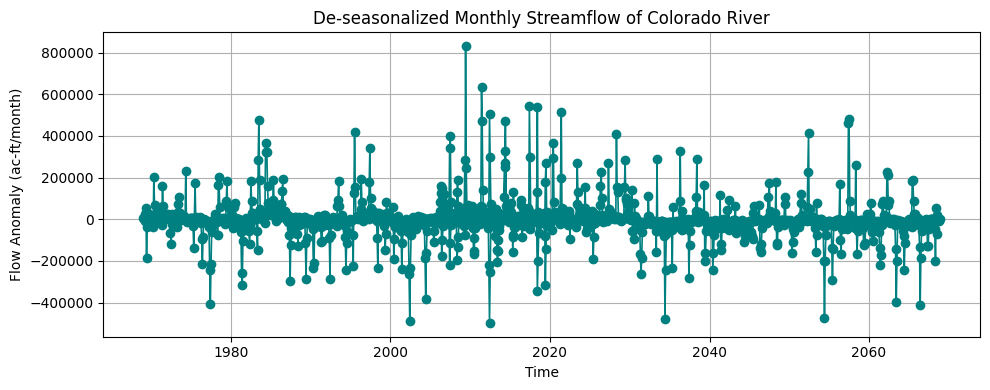

<Figure size 600x400 with 0 Axes>

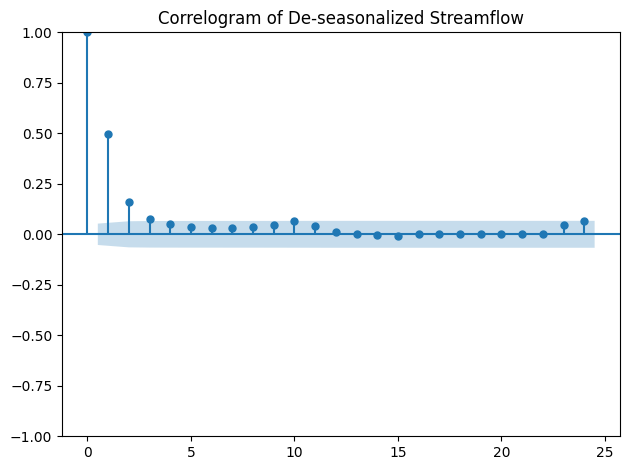

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Read CSV file
data = pd.read_csv('Data.csv')

# The column names in file are:
# 'Time (mm-yy)' and 'Streamflow (ac-ft/month)'
data.columns = ['Time', 'Flow']

# Convert 'Time' to datetime using the mm/yy format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%y')

# Extract month number (1 = Jan, ..., 12 = Dec)
data['Month'] = data['Time'].dt.month

# (a) Compute monthly mean and standard deviation
monthly_stats = data.groupby('Month')['Flow'].agg(['mean', 'std'])
print("\nMonthly Mean and Standard Deviation of Streamflow (ac-ft/month):")
print(monthly_stats)

# (b) De-seasonalize by subtracting the monthly mean
data = data.merge(monthly_stats['mean'], on='Month', suffixes=('', '_mean'))
data['Deseasonalized'] = data['Flow'] - data['mean']

# (6) Plot the de-seasonalized time series
plt.figure(figsize=(10,4))
plt.plot(data['Time'], data['Deseasonalized'], color='teal', marker='o', linewidth=1.2)
plt.title('De-seasonalized Monthly Streamflow of Colorado River')
plt.xlabel('Time')
plt.ylabel('Flow Anomaly (ac-ft/month)')
plt.grid(True)
plt.tight_layout()
plt.show()

# (7) Plot the correlogram (autocorrelation function)
plt.figure(figsize=(6,4))
plot_acf(data['Deseasonalized'], lags=24, alpha=0.05)
plt.title('Correlogram of De-seasonalized Streamflow')
plt.tight_layout()
plt.show()


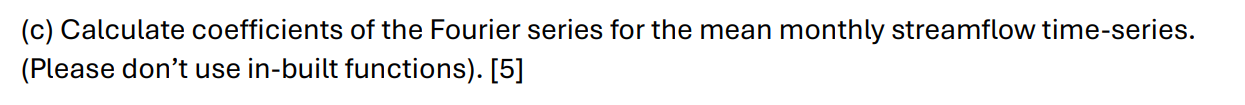


Fourier Series Coefficients for Mean Monthly Streamflow:
a0 = 176824.919
a1 = -208950.198,  b1 = -2580.868
a2 = 134340.734,  b2 = -21403.109
a3 = -75906.598,  b3 = 22589.170
a4 = 37748.956,  b4 = -17632.920
a5 = -20199.470,  b5 = 11313.853
a6 = 14752.740,  b6 = 0.000


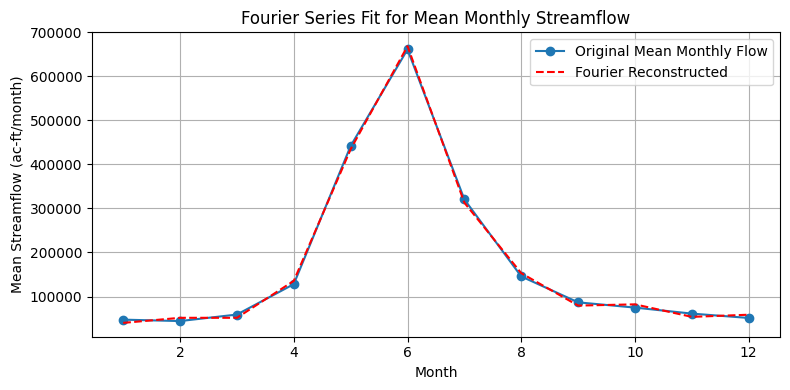

In [6]:
import numpy as np
import pandas as pd

monthly_means = monthly_stats['mean'].values  # length = 12
N = len(monthly_means)

# Compute a0
a0 = (1/N) * np.sum(monthly_means)

# Compute ak and bk coefficients
a = []
b = []
for k in range(1, N//2 + 1):
    ak = (2/N) * np.sum(monthly_means * np.cos(2 * np.pi * k * np.arange(1, N+1) / N))
    bk = (2/N) * np.sum(monthly_means * np.sin(2 * np.pi * k * np.arange(1, N+1) / N))
    a.append(ak)
    b.append(bk)

# results
print("\nFourier Series Coefficients for Mean Monthly Streamflow:")
print(f"a0 = {a0:.3f}")
for k in range(1, len(a)+1):
    print(f"a{k} = {a[k-1]:.3f},  b{k} = {b[k-1]:.3f}")

# fitted Fourier series for visualization
t = np.arange(1, N+1)
f_reconstructed = a0 + np.zeros(N)
for k in range(1, N//2 + 1):
    f_reconstructed += a[k-1] * np.cos(2*np.pi*k*t/N) + b[k-1] * np.sin(2*np.pi*k*t/N)

# Plot the original vs reconstructed mean monthly streamflow
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(t, monthly_means, 'o-', label='Original Mean Monthly Flow')
plt.plot(t, f_reconstructed, 'r--', label='Fourier Reconstructed')
plt.xlabel('Month')
plt.ylabel('Mean Streamflow (ac-ft/month)')
plt.title('Fourier Series Fit for Mean Monthly Streamflow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


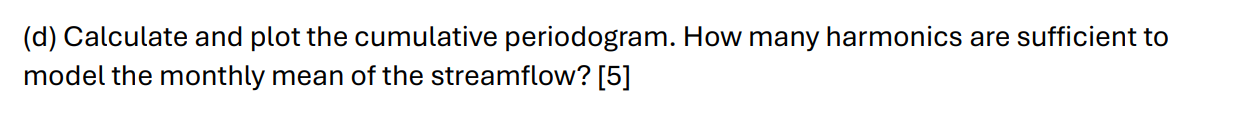

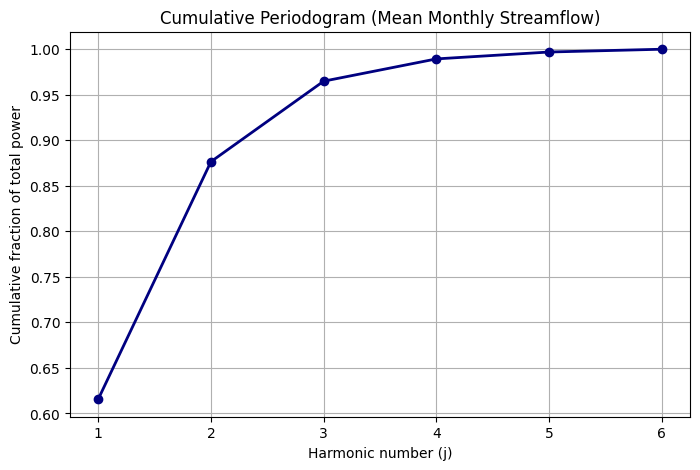

Number of harmonics sufficient to model monthly mean streamflow: 3


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data
df = pd.read_csv("Data.csv")
df.columns = ['Time', 'Flow']
df['Time'] = pd.to_datetime(df['Time'], format='%m/%y', errors='coerce')
df['Month'] = df['Time'].dt.month

# mean monthly series
monthly_stats = df.groupby('Month')['Flow'].agg(['mean', 'std']).sort_index()
monthly_means = monthly_stats['mean'].values  # expected length = 12 months
N = len(monthly_means)
if N != 12:
    print(f"Expected 12 monthly means, got {N}")

# Compute Fourier coefficients
# a0 = (1/N) * Σ x_t
a0 = (1.0 / N) * np.sum(monthly_means)

# For k = 1 .. N/2
Kmax = N // 2
a = np.zeros(Kmax)
b = np.zeros(Kmax)
n = np.arange(1, N + 1)

for k in range(1, Kmax + 1):
    a[k - 1] = (2.0 / N) * np.sum(monthly_means * np.cos(2.0 * np.pi * k * n / N))
    b[k - 1] = (2.0 / N) * np.sum(monthly_means * np.sin(2.0 * np.pi * k * n / N))

# Mean Square Deviation (MSD_j)
MSD = 0.5 * (a**2 + b**2)

# Cumulative periodogram = cumulative sum of MSD_j / total sum of MSD_j
cum_periodogram = np.cumsum(MSD) / np.sum(MSD)

#Plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, Kmax + 1), cum_periodogram, 'o-', linewidth=2, color='navy')
plt.xlabel('Harmonic number (j)')
plt.ylabel('Cumulative fraction of total power')
plt.title('Cumulative Periodogram (Mean Monthly Streamflow)')
plt.grid(True)
plt.show()

# Determine sufficient number of harmonics
# (e.g., up to where ~90% of variance is captured)
threshold = 0.9
sufficient_harmonics = np.argmax(cum_periodogram >= threshold) + 1
print(f"Number of harmonics sufficient to model monthly mean streamflow: {sufficient_harmonics}")
